In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
import os
os.environ['PYTHONHASHSEED']=str(7)

In [3]:
data = pd.read_csv('../data/bitcoin_zip/bitcoin_csv.csv')

In [4]:
data.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [5]:
clean_data = data[~data[data.columns[1]].isna()]
# print((clean_data.blockSize.min(), clean_data.blockSize.max()))

In [6]:
clean_data.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
1570,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171.0,49.980091,0.0005,21597536,177
1571,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426.0,62.425891,0.0005,25676453,174
1572,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258.0,26.942145,0.0005,27042465,149
1573,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129.0,38.671980,0.0005,25727393,151
1574,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721.0,35.382348,0.0005,26388234,134


In [7]:

clean_data.blockSize = (clean_data.blockSize - clean_data.blockSize.min())/(clean_data.blockSize.max() - clean_data.blockSize.min())
clean_data = clean_data.drop(columns=['date', 'marketcap(USD)'])

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [9]:
col_idx = 2

In [10]:
y_columns = ['medianTxValue(USD)', 'medianFee', 'blockSize', 'blockCount']
X = clean_data.drop(columns=y_columns)
y = clean_data.loc[:, y_columns[col_idx]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping

In [996]:
def getModel0():
    model = Sequential()
    model.add(Dense(100, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [997]:
def getModel1():
    model = Sequential()
    model.add(Dense(100, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(Dropout(0.5))

    model.add(Dense(30, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Dense(10, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [998]:
def getModel2():
    model = Sequential()
    model.add(Dense(100, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(LeakyReLU())
    # model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(500, kernel_initializer='normal'))
    model.add(LeakyReLU())
    # model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(500, kernel_initializer='normal'))
    model.add(LeakyReLU())
    # model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(30, kernel_initializer='normal'))
    model.add(LeakyReLU())
    # model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(10, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    # model.add(BatchNormalization())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [999]:
def getModel3():
    model = Sequential()
    model.add(Dense(100, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(500, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1000, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(500, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(30, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(10, input_dim=10, kernel_initializer='normal'))
    model.add(LeakyReLU())

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    # model.add(BatchNormalization())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [1000]:
model = eval("getModel{}()".format(col_idx))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_278 (Dense)            (None, 100)               1100      
_________________________________________________________________
leaky_re_lu_276 (LeakyReLU)  (None, 100)               0         
_________________________________________________________________
batch_normalization_120 (Bat (None, 100)               400       
_________________________________________________________________
dense_279 (Dense)            (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_277 (LeakyReLU)  (None, 100)               0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_280 (Dense)            (None, 500)               50500     
__________

In [1001]:
early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, callbacks=[early_stopping_monitor]);
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=70);

Train on 1302 samples, validate on 326 samples
Epoch 1/70
1302/1302 [==============================] - 13s 10ms/step - loss: 0.1182 - val_loss: 0.0833
Epoch 2/70
1302/1302 [==============================] - 0s 281us/step - loss: 0.0584 - val_loss: 0.0457
Epoch 3/70
1302/1302 [==============================] - 0s 282us/step - loss: 0.0434 - val_loss: 0.0421
Epoch 4/70
1302/1302 [==============================] - 0s 277us/step - loss: 0.0381 - val_loss: 0.0344
Epoch 5/70
1302/1302 [==============================] - 0s 276us/step - loss: 0.0394 - val_loss: 0.0284
Epoch 6/70
1302/1302 [==============================] - 0s 280us/step - loss: 0.0387 - val_loss: 0.0312
Epoch 7/70
1302/1302 [==============================] - 0s 277us/step - loss: 0.0355 - val_loss: 0.0376
Epoch 8/70
1302/1302 [==============================] - 0s 275us/step - loss: 0.0369 - val_loss: 0.0505


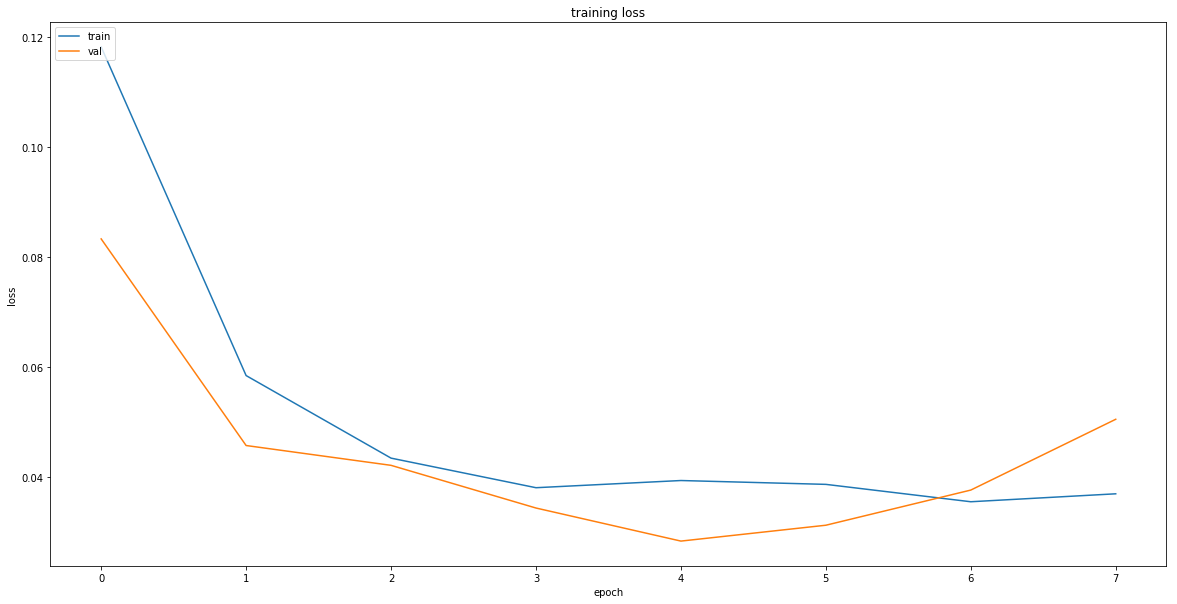

In [1002]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [943]:
# model.save_weights("./weights/new_model/model{}.hfpy".format(col_idx))

In [944]:
xx = X_train
yy = y_train.values
yp = model.predict(xx)
getStats(yy, yp)

Rel Error =  42.65136623488527
RMSE =  204.70341617474128


In [945]:
xx = X_test
yy = y_test.values
yp = model.predict(xx)
getStats(yy, yp)

Rel Error =  20.799442202665304
RMSE =  140.65143752451303


In [12]:
def getStats(yt, yp, plot_flag=False):
    print("Rel Error = ", np.linalg.norm(np.array(yp - yt))/np.linalg.norm(np.array(yt)))
    print("RMSE = ", np.sqrt(mean_squared_error(yt, yp)))

    if plot_flag:
        X = np.arange(len(yp))
        plt.scatter(X, np.array(yp), label='Predicted', marker='.')
        plt.scatter(X, yt, label='Actual', marker='.')
        plt.legend()
        plt.xlabel('Time')
        plt.show()

        ypii = [yp[i] for i in range(len(yp)) if i%10 == 1]
        ytii = [yt[i] for i in range(len(yt)) if i%10 == 1]
        xx = np.arange(len(ypii))

        plt.scatter(xx, ypii, marker='.')
        plt.scatter(xx, ytii, marker='.')
        plt.plot(xx, ypii, label='Predicted')
        plt.plot(xx, ytii, label='Actual')
        plt.legend()
        plt.xlabel('Time')
        plt.show()

# XGBoost

In [13]:
import xgboost as xgb

In [14]:
X = clean_data.drop(columns=y_columns)
y = clean_data.loc[:, y_columns]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
xx = X_train
yy = y_train.values[:, col_idx]

In [17]:
data_dmatrix = xgb.DMatrix(data=xx,label=yy)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, gamma=10000, reg_lambda=10, n_estimators = 50)

In [62]:
data_dmatrix = xgb.DMatrix(data=xx,label=yy)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 5, alpha = 10, gamma=0, reg_lambda=10, n_estimators = 5)

In [63]:
xg_reg.fit(xx, yy)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=10, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [60]:
yp = xg_reg.predict(xx)

In [27]:
getStats(yy, yp)

Rel Error =  0.5207639682650178
RMSE =  0.2542443194721762


In [28]:
xx = X_test
yy = y_test.values[:, col_idx]
yp = xg_reg.predict(xx)
getStats(yy, yp)

Rel Error =  0.5207639682650178
RMSE =  0.2542443194721762


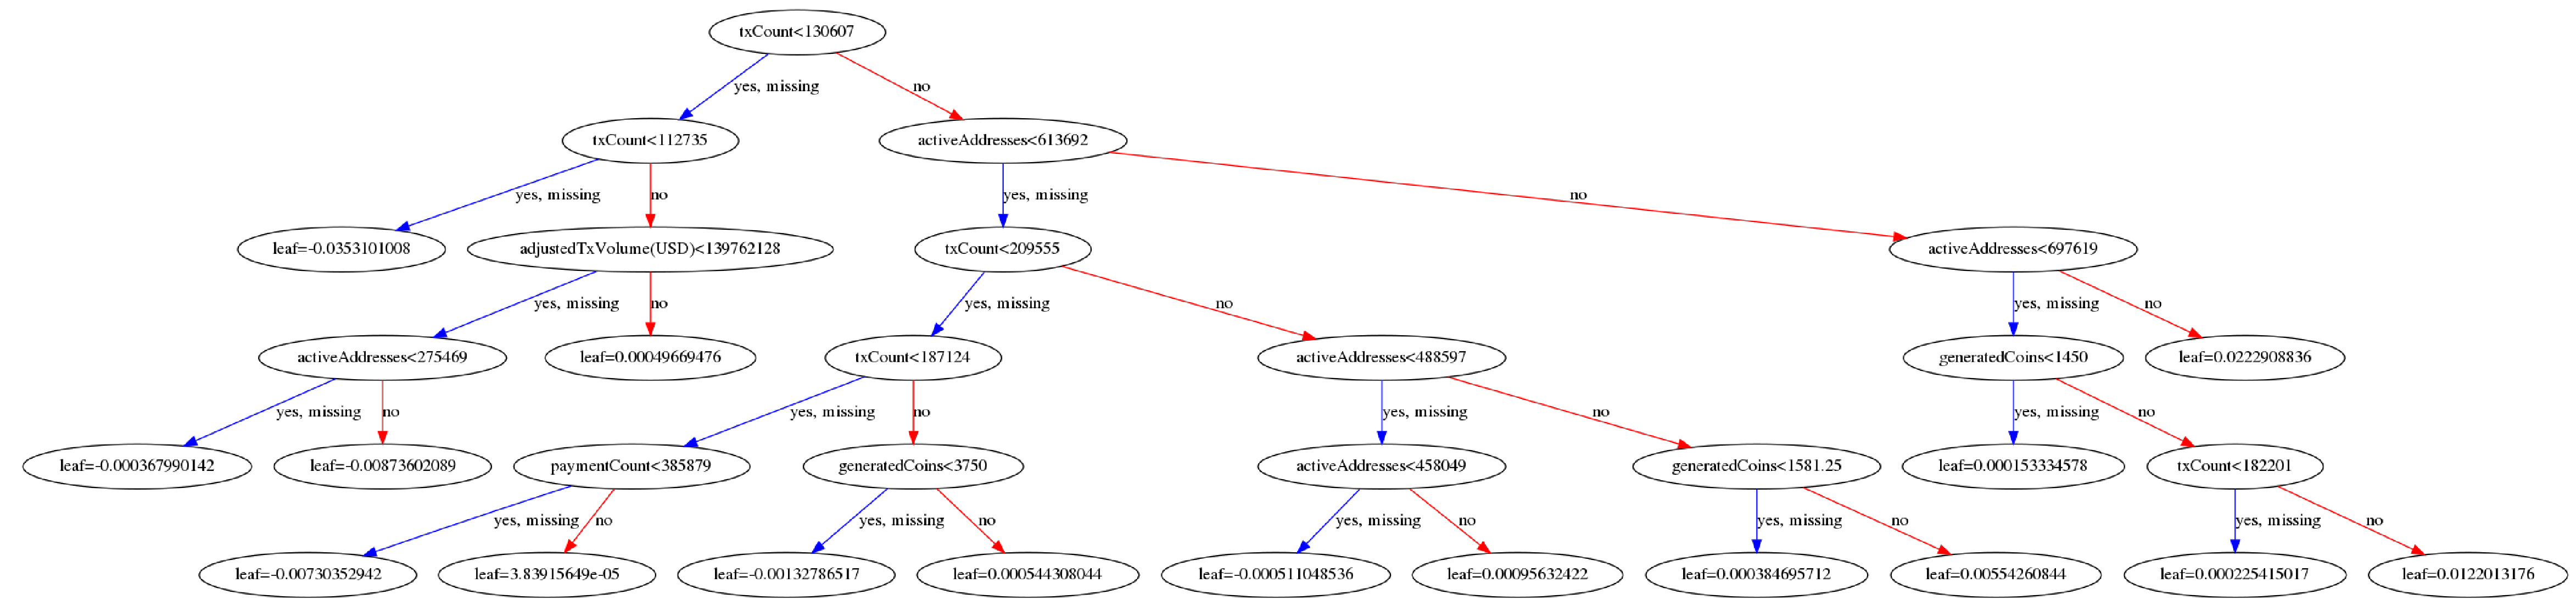

In [64]:
plt.rcParams['figure.figsize'] = [100, 20]
xgb.plot_tree(xg_reg)
plt.savefig('/home/epsilon/Desktop/full_model.png')
plt.show()

In [1012]:
y_columns = ['medianTxValue(USD)', 'medianFee', 'blockSize', 'blockCount']

In [1013]:
X_train.head()

,txVolume(USD),adjustedTxVolume(USD),txCount,price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount
3175,6.686534e+09,3.071625e+09,282761,4073.79,1.563980e+09,1950.0,173.703415,786890,1.103401e+12,424354.0
3256,3.931362e+10,1.595858e+10,403225,16523.30,1.391130e+10,2175.0,567.088424,1187736,1.590897e+12,632247.0
3322,8.924752e+09,5.121184e+09,182820,8926.72,5.696720e+09,2050.0,68.573253,852830,2.874674e+12,308786.0
2315,2.444931e+08,7.502065e+07,108696,241.40,2.718010e+07,4050.0,15.481621,248774,4.764340e+10,200652.0
2905,1.659745e+09,6.652993e+08,304845,864.89,2.755640e+08,1900.0,100.487715,659622,3.101539e+11,399907.0


In [1014]:
index = 3256
df = X_train.loc[index, :]

In [1015]:
df = X_train.loc[index, :]
df["txVolume(USD)"] = df.txCount*avgTxValue
df["adjustedTxVolume(USD)"] = df["txVolume(USD)"]*adjFac
df["txCount"] = 54*countFac
df["price(USD)"] = df["txCount"]*priceFac
df["fees"] = 460.16
df["generatedCoins"] = df["txCount"]*coinFac
df["activeAddresses"] = 16*df["activeAddresses"]*addressFac

In [1016]:
X_train.loc[index, :] = df

In [1017]:
from keras.models import load_model

In [1018]:
model = load_model('./weights/new_model/model{}.hfpy'.format(col_idx))

In [1019]:
scale_a, scale_b = 14163674, 204023669

In [1020]:
xg_reg.predict(X_train)[0]

0.40191853

In [780]:
avgTxValue = X_train["txVolume(USD)"].sum()/X_train["txCount"].sum()

In [670]:
adjFac = X_train["adjustedTxVolume(USD)"].sum()/X_train["txVolume(USD)"].sum()

In [677]:
priceFac = X_train["price(USD)"].sum()/X_train["txCount"].sum()

In [681]:
coinFac = X_train["generatedCoins"].sum()/X_train["txCount"].sum()

In [690]:
addressFac = 5000/X_train["activeAddresses"].mean()

In [753]:
['medianTxValue(USD)', 'medianFee', 'blockSize', 'blockCount']

['medianTxValue(USD)', 'medianFee', 'blockSize', 'blockCount']